In [3]:
import pandas as pd
import numpy as np
from collections import Counter

# Import Data

In [260]:
news_df = pd.read_csv('../data_intermed/news.csv')
news_df = news_df[news_df['text']!=" "]

In [261]:
puretext = news_df.puretext.values

In [262]:
news_df.head(2)

,Unnamed: 0,title,text,subject,date,label,cleantext,source,puretext,puretitle,puretext_wpunc,puretitle_wpunc
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true,The head of a conservative Republican faction ...,WASHINGTON (Reuters),the head of a conservative republican faction ...,as us budget fight looms republicans flip thei...,the head of a conservative republican faction ...,"as u.s. budget fight looms, republicans flip t..."
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true,Transgender people will be allowed for the fir...,WASHINGTON (Reuters),transgender people will be allowed for the fir...,us military to accept transgender recruits on ...,transgender people will be allowed for the fir...,u.s. military to accept transgender recruits o...


In [265]:
news_df[news_df['label']=='fake']['text'][41008]

'Here s Pence getting booed as he gets to his seats at Hamilton pic.twitter.com/IRQG68x1sB  David K (@dkipke12) November 19, 2016Yes #MikePence was at @HamiltonMusical here s what we had to say pic.twitter.com/YIjt7JZ3gF  G R E G O R Y (@ghaney22) November 19, 2016'

In [267]:
news_df[news_df['label']=='fake']['text'][33001]

'You re gonna love this!The left has been screaming for decades about the government interfering in their right to kill their babies. Because after all, even though it s a human life in its earliest stages of development; it s growing inside their womb, so the government has no business protecting the innocent life of that baby in THEIR bodies.Strangely enough, the left is angry about Trump s decision to let the states decide if they will or will not force its citizens to share a bathroom or public shower with a person who claims to be a certain gender contrary to what their genitals say they are. Clearly the hypocritical left can t make up their mind when it s okay, or when it s not okay for the government to tell citizens what they can or cannot do '

In [268]:
news_df[news_df['label']=='true']['text'][1]

'WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition 

In [269]:
def searchSource(text, term):
    return term in text

In [322]:
news_df['21stCenturyWire'] = news_df['puretext'].apply(lambda x: searchSource(x, '21st century wire'))
news_df['video_title'] = news_df['puretitle'].apply(lambda x: searchSource(x, 'video'))
news_df['(VIDEO)_title'] = news_df['title'].apply(lambda x: searchSource(x, '(VIDEO)'))
news_df['[VIDEO]_title'] = news_df['title'].apply(lambda x: searchSource(x, '[VIDEO]'))
news_df['VIDEO_title'] = news_df['title'].apply(lambda x: searchSource(x, 'VIDEO'))
news_df['Video_title'] = news_df['title'].apply(lambda x: searchSource(x, 'Video'))
news_df['Videos_title'] = news_df['title'].apply(lambda x: searchSource(x, 'Videos'))
news_df['images_title'] = news_df['puretitle'].apply(lambda x: searchSource(x, 'images'))
news_df['IMAGES_title'] = news_df['title'].apply(lambda x: searchSource(x, 'IMAGES'))
news_df['Reuters'] = news_df['text'].apply(lambda x: searchSource(x, 'Reuters'))

In [323]:
news_df.groupby('label').sum()

,Unnamed: 0,21stCenturyWire,video_title,images_title,Reuters,numUniqueWords,numWords,percUniqueWords,VIDEO_title,IMAGES_title,(VIDEO)_title,[VIDEO]_title,Video_title,Videos_title
label,,,,,,,,,,,,,,
fake,756009231,1254.0,7855.0,164.0,311.0,5100157,9903049,13187.041939,5314.0,156.0,2492.0,2372.0,2645.0,28.0
true,229324266,0.0,40.0,2.0,21378.0,4398683,8186269,12760.516454,0.0,0.0,0.0,0.0,1.0,0.0


In [318]:
news_df[(news_df.video_title== True) & (news_df.label == "fake")].title

21435     SNL Hilariously Mocks Accused Child Molester ...
21441     White House: It Wasn’t Sexist For Trump To Sl...
21443     Accused Child Molesting Senate Candidate Roy ...
21445     Liberal Group Trolls Trump At Roy Moore Rally...
21458     ‘Ghost Of Witness Flipped’: Hilarious SNL Ski...
                               ...                        
44637    VIDEO: Watch James O’Keefe Easily Obtain Emine...
44655    AGITPROP MACHINE: How the US create Fake Al Qa...
44711    VIDEO: Top 10 Most Embarrassing Presidential F...
44721                    VIDEO: The Dallas Shooting Agenda
44876    FBI Release Oregon Video Footage Depicting Dea...
Name: title, Length: 7855, dtype: object

In [320]:
import re

In [321]:
re.sub('\(Video\)|(\(|\[)(.)*VIDEO(S)?(.)*(\)|\])','','VIDEO: XX')

'VIDEO: XX'

In [116]:
# # remove punctuation and tokenize
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

In [117]:
# # clean to tokenize text and title
# tokenizer_nltk = nltk.RegexpTokenizer(r"\w+")
# news_df['texttoken'] = news_df['puretext'].apply(lambda x: tokenizer_nltk.tokenize(x))
# news_df['titletoken'] = news_df['title'].apply(lambda x: tokenizer_nltk.tokenize(x))

# Count Number of Words

In [277]:
def numUniqueWords(text):
    return len(Counter(text.split()))

def numWords(text):
    return len(text.split())

In [278]:
numUniqueWords(puretext[0]), numWords(puretext[0])

(381, 743)

In [279]:
news_df['numUniqueWords'] = news_df['puretext'].apply(lambda x: numUniqueWords(x))
news_df['numWords'] = news_df['puretext'].apply(lambda x: numWords(x))+1
news_df['percUniqueWords'] = news_df['numUniqueWords']/news_df['numWords']

In [280]:
word_counts = news_df.groupby('label').sum()
word_counts.rename(columns={'Unnamed: 0': 'total'})

,total,21stCenturyWire,video_title,images_title,Reuters,numUniqueWords,numWords,percUniqueWords
label,,,,,,,,
fake,756009231,1254.0,7855.0,164.0,311.0,5100157,9903049,13187.041939
true,229324266,0.0,40.0,2.0,21378.0,4398683,8186269,12760.516454


In [281]:
news_df.groupby('label').median()

,Unnamed: 0,21stCenturyWire,video_title,images_title,Reuters,numUniqueWords,numWords,percUniqueWords
label,,,,,,,,
fake,32909.0,False,False,False,False,205.0,367.0,0.559028
true,10708.5,False,False,False,True,200.0,357.0,0.573676


In [283]:
news_df.groupby(['label','video_title']).median()

Unnamed: 0  21stCenturyWire  images_title  Reuters  \
label video_title                                                       
fake  False           32324.0            False         False    False   
      True            33365.0            False         False    False   
true  False           10710.5            False         False     True   
      True             9791.0            False         False     True   

                   numUniqueWords  numWords  percUniqueWords  
label video_title                                             
fake  False                 220.0     399.0         0.550239  
      True                  178.0     311.0         0.578788  
true  False                 200.0     357.0         0.573770  
      True                  230.0     411.0         0.547586

In [44]:
import matplotlib.pyplot as plt
# https://matplotlib.org/3.1.1/gallery/statistics/histogram_multihist.html

In [34]:
news_df.percUniqueWords.size

44898

In [45]:
# set for histograms
percUniqueWords = news_df.percUniqueWords.values
labels = news_df.label.values
y = np.zeros(labels.shape)
y[labels == 'fake'] = 1

percUniqueWordsList = []
percUniqueWordsTrue = percUniqueWords[labels=="true"]
percUniqueWordsFake = percUniqueWords[labels=="fake"]
percUniqueWordsList.append(percUniqueWordsTrue)
percUniqueWordsList.append(percUniqueWordsFake)

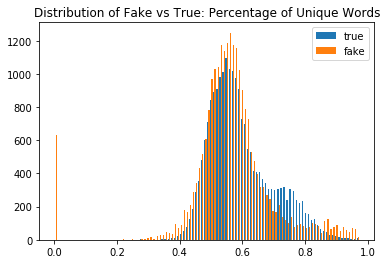

In [46]:
# plot histogram
n_bins = 100

# stacked bar
plt.hist(percUniqueWordsList, n_bins, density=False, histtype='bar', #stacked=True, 
         label=['true','fake'])

plt.title('Distribution of Fake vs True: Percentage of Unique Words')
plt.legend()

plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [48]:
def lrModelEval(X, y, test_perc):
    X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=test_perc, random_state=42)
    
    clf = LogisticRegression(random_state=0, max_iter = 1000).fit(X_train, y_train)
    
    # predict
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    assert(y_pred_train.shape == y_train.shape)
    assert(y_pred_test.shape == y_test.shape)
    
    # evaluate
    
    print('training accuracy:', clf.score(X_train, y_train))
    print('test accuracy:', clf.score(X_test, y_test))
    print('train f-score:', f1_score(y_train, y_pred_train))
    print('test f-score:', f1_score(y_test, y_pred_test))
    
    return clf

In [49]:
lrModelEval(percUniqueWords, y, 0.33)

training accuracy: 0.5584920714072006
test accuracy: 0.555578052237295
train f-score: 0.6479709491875845
test f-score: 0.6460248347040799


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)